In [1]:
import PhotochemPy as photo
pt = photo.PhotochemPy('input/species.dat','input/reactions.rx')

In [1]:
import numpy as np
from Photochem import photochem
import time

In [5]:
nz = 200
nq = 61
nnp = 4
nsp = 74
nr = 392
ks = 33
kj = 60
photochem.allocate_memory(nz,nq,nnp,nsp,nr,ks,kj)
# now read input files
photochem.read_species('input/speciesOG.dat')
photochem.read_reactions('input/reactions.rx')
photochem.read_planet('input/planet.dat')
photochem.read_photochem('input/input_photchem.dat')
photochem.read_atmosphere('input/atmosphere.txt')
photochem.photgrid(100.0e5)
photochem.densty()
photochem.rates()
photochem.difco()
H2O = photochem.photsatrat(photochem.jtrop,photochem.nz)
fval = photochem.dochem(-1,photochem.jtrop,photochem.isl,photochem.usol_init)
photochem.ltning(photochem.usol_init)
photochem.aertab()
photochem.initphoto('input/Sun_2.7Ga.txt')
photochem.flux = np.loadtxt('flux.dat')
photochem.initmie(photochem.nw,photochem.wavl,photochem.frak,photochem.ihztype)

# in the loop

prates = photochem.photo(photochem.zy,photochem.agl,photochem.io2\
                    ,photochem.ino,photochem.usol_init,photochem.kj)
# photochem.rainout(22,0,photochem.usol_init)
# photochem.aercon(photochem.usol_init)
# conver = photochem.sedmnt(photochem.frak,photochem.hcdens, photochem.ihztype,photochem.nz,photochem.np)

# fval = photochem.dochem(0,photochem.jtrop,photochem.isl,photochem.usol_init)



In [8]:
data = np.loadtxt('pratesground.dat')
for i in range(kj):
    print(i+1,'%.4e'%(prates[i,0]/data[i]),'%.4e'%(prates[i,0]),'%.4e'%(data[i]))

1 nan 0.0000e+00 0.0000e+00
2 9.9312e-01 7.5088e-11 7.5608e-11
3 9.8982e-01 5.5398e-12 5.5967e-12
4 9.9501e-01 1.5648e-03 1.5727e-03
5 9.9728e-01 3.6046e-04 3.6145e-04
6 9.9501e-01 1.7529e-05 1.7617e-05
7 9.8490e-01 9.1092e-15 9.2489e-15
8 nan 0.0000e+00 0.0000e+00
9 9.9683e-01 1.9085e-05 1.9145e-05
10 9.9635e-01 2.0451e-05 2.0526e-05
11 9.9348e-01 7.0143e-05 7.0604e-05
12 9.9396e-01 8.2179e-06 8.2679e-06
13 2.7203e+01 1.2538e-66 4.6092e-68
14 9.9785e-01 2.7295e-03 2.7353e-03
15 9.9282e-01 3.3138e-05 3.3378e-05
16 9.9308e-01 2.0400e-05 2.0542e-05
17 9.9230e-01 8.2617e-06 8.3258e-06
18 9.9574e-01 4.5026e-04 4.5219e-04
19 9.9787e-01 4.2040e-07 4.2130e-07
20 9.9601e-01 3.1016e-04 3.1140e-04
21 9.9601e-01 3.1016e-04 3.1140e-04
22 9.9601e-01 3.1016e-04 3.1140e-04
23 9.9375e-01 4.2447e-06 4.2714e-06
24 9.9348e-01 7.0143e-05 7.0604e-05
25 9.9356e-01 3.1950e-06 3.2157e-06
26 9.9035e-01 3.7843e-05 3.8211e-05
27 9.9677e-01 7.3712e-05 7.3951e-05
28 nan 0.0000e+00 0.0000e+00
29 nan 0.0000e+00 0.00

/Users/nicholas/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
aa = np.loadtxt('a.dat')

In [7]:
for i in range(nr):
    ground = photochem.a[i,0]/aa[i][0]
    top = photochem.a[i,-1]/aa[i][1]
    print(i+1,'%.4e'%ground,'%.4e'%top)
    
    if not .9<ground<1.1 or not .9<top<1.1:
        print('problem with',i+1)


1 1.0000e+00 1.0000e+00
2 1.0000e+00 1.0000e+00
3 1.0000e+00 1.0000e+00
4 1.0000e+00 1.0000e+00
5 1.0000e+00 1.0000e+00
6 1.0000e+00 1.0000e+00
7 1.0000e+00 1.0000e+00
8 1.0000e+00 1.0000e+00
9 1.0000e+00 1.0000e+00
10 1.0000e+00 1.0000e+00
11 1.0000e+00 1.0000e+00
12 1.0000e+00 1.0000e+00
13 1.0000e+00 1.0000e+00
14 1.0000e+00 1.0000e+00
15 1.0000e+00 1.0000e+00
16 1.0000e+00 1.0000e+00
17 1.0000e+00 1.0000e+00
18 1.0000e+00 1.0000e+00
19 1.0000e+00 1.0000e+00
20 1.0000e+00 1.0000e+00
21 1.0000e+00 1.0000e+00
22 1.0000e+00 1.0000e+00
23 nan 1.0000e+00
problem with 23
24 9.9312e-01 1.0008e+00
25 9.8982e-01 1.0004e+00
26 9.9501e-01 1.0012e+00
27 9.9728e-01 1.0010e+00
28 9.9501e-01 1.0011e+00
29 9.8490e-01 1.0012e+00
30 nan 1.0001e+00
problem with 30
31 1.0000e+00 1.0000e+00
32 1.0000e+00 1.0000e+00
33 1.0000e+00 1.0000e+00
34 1.0000e+00 1.0000e+00
35 1.0000e+00 1.0000e+00
36 1.0000e+00 1.0000e+00
37 1.0000e+00 1.0000e+00
38 1.0000e+00 1.0000e+00
39 9.9683e-01 1.0012e+00
40 9.9635e-01 1.

/Users/nicholas/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/nicholas/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


1 nan 0.0000e+00 0.0000e+00
2 9.9312e-01 7.5088e-11 7.5608e-11
3 9.8982e-01 5.5398e-12 5.5967e-12
4 9.9501e-01 1.5648e-03 1.5727e-03
5 9.9728e-01 3.6046e-04 3.6145e-04
6 9.9501e-01 1.7529e-05 1.7617e-05
7 9.8490e-01 9.1092e-15 9.2489e-15
8 nan 0.0000e+00 0.0000e+00
9 9.9683e-01 1.9085e-05 1.9145e-05
10 9.9635e-01 2.0451e-05 2.0526e-05
11 9.9348e-01 7.0143e-05 7.0604e-05
12 9.9396e-01 8.2179e-06 8.2679e-06
13 2.7203e+01 1.2538e-66 4.6092e-68
14 9.9785e-01 2.7295e-03 2.7353e-03
15 9.9282e-01 3.3138e-05 3.3378e-05
16 9.9308e-01 2.0400e-05 2.0542e-05
17 9.9230e-01 8.2617e-06 8.3258e-06
18 9.9574e-01 4.5026e-04 4.5219e-04
19 9.9787e-01 4.2040e-07 4.2130e-07
20 9.9601e-01 3.1016e-04 3.1140e-04
21 9.9601e-01 3.1016e-04 3.1140e-04
22 9.9601e-01 3.1016e-04 3.1140e-04
23 9.9375e-01 4.2447e-06 4.2714e-06
24 9.9348e-01 7.0143e-05 7.0604e-05
25 9.9356e-01 3.1950e-06 3.2157e-06
26 9.9035e-01 3.7843e-05 3.8211e-05
27 9.9677e-01 7.3712e-05 7.3951e-05
28 nan 0.0000e+00 0.0000e+00
29 nan 0.0000e+00 0.00

/Users/nicholas/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [ ]:
for i in range(kj):
#     if data[i] == 0.0:
#         print('ok')
#     else:
    print(i+1,'%.4e'%(prates[i,0]/data[i]),'%.4e'%(prates[i,0]),'%.4e'%(data[i]))
#     if not 1.1>(prates[i,-1]/data[i])>.9:
#         print(i+1)

In [11]:
xp= 2030225.7129042968
den = 2.5711410488612839E+019
xl =  7.6783087426888740E-003
raingc = 0.0000000000000000 
usol = 1.0271830999999999E-011

xlj = xl + raingc
fval = xp/den-xlj*usol
xlj*usol

7.88702897707226e-14

In [7]:
xp= 2020992.2183751559
den = 2.5711411274462069E+019
xl =  7.6783092060112024E-003
raingc = 0.0000000000000000 
usol = 1.0271830999999999E-011

xlj = xl + raingc
fval = xp/den-xlj*usol
xp/den

7.860292835743763e-14

In [2]:
fval

-2.673661724536171e-16

In [1]:
import numpy as np
from Photochem import photochem
import time
nz = 200
nq = 61
nnp = 4
nsp = 74
nr = 392
ks = 33
kj = 60
photochem.allocate_memory(nz,nq,nnp,nsp,nr,ks,kj)
photochem.setup('input/speciesOG.dat', \
               'input/reactions.rx', \
               'input/planet.dat', \
               'input/input_photchem.dat', \
               'input/atmosphere.txt', \
               'input/Sun_2.7Ga.txt')

photochem.flux = np.loadtxt('flux.dat')


In [2]:
start = time.time()
photochem.integrate()
end = time.time()
print(end-start)

7.518234968185425


In [2]:
start = time.time()
photochem.integrate()
end = time.time()
print(end-start)

7.457395792007446


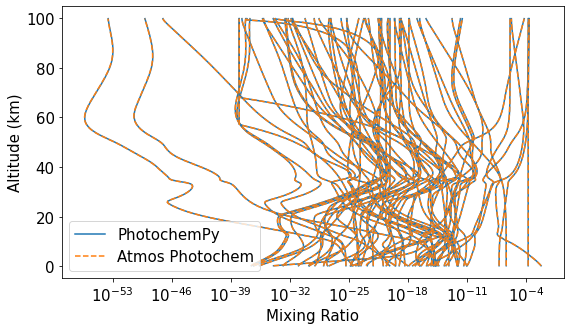

In [15]:
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[9,5])

for i in range(nq):
    if i==0:
        ax.plot(photochem.usol_out[i,:],photochem.z/1e5,'C0',label='PhotochemPy')
        ax.plot(photochem.usol_init[i,:],photochem.z/1e5,'C1--',label='Atmos Photochem')
    else:
        ax.plot(photochem.usol_out[i,:],photochem.z/1e5,'C0')
        ax.plot(photochem.usol_init[i,:],photochem.z/1e5,'C1--')
ax.set_xscale('log')

ax.legend()
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Mixing Ratio')

plt.savefig("Comparison.jpg",dpi = 100,bbox_inches='tight')


plt.show()


In [92]:
18+19

37

In [48]:
photochem.usol_out[i,:]

array([0.00080346, 0.00080346, 0.00080346, 0.00080347, 0.00080347,
       0.00080347, 0.00080347, 0.00080347, 0.00080347, 0.00080347,
       0.00080347, 0.00080347, 0.00080347, 0.00080347, 0.00080347,
       0.00080347, 0.00080347, 0.00080347, 0.00080346, 0.00080346,
       0.00080346, 0.00080346, 0.00080346, 0.00080346, 0.00080346,
       0.00080346, 0.00080346, 0.00080347, 0.00080349, 0.00080351,
       0.00080355, 0.0008036 , 0.00080366, 0.00080374, 0.00080383,
       0.00080393, 0.00080403, 0.00080415, 0.00080428, 0.00080441,
       0.00080455, 0.00080469, 0.00080484, 0.00080499, 0.00080515,
       0.00080531, 0.00080547, 0.00080564, 0.00080582, 0.00080599,
       0.00080618, 0.00080637, 0.00080656, 0.00080677, 0.00080698,
       0.00080719, 0.00080742, 0.00080765, 0.00080789, 0.00080815,
       0.00080842, 0.0008087 , 0.00080899, 0.00080928, 0.0008096 ,
       0.00080992, 0.00081026, 0.00081061, 0.00081098, 0.00081135,
       0.00081174, 0.00081214, 0.00081255, 0.00081297, 0.00081

In [20]:
for i in range(nq):
    for j in range(200):
        out = photochem.usol_out[i,j]/photochem.usol_init[i,j]
        
        if not .1<out<10:
            print(i,out,photochem.z[j]/1e5)

0 0.0979842504565631 42.75
1 0.05957722066812549 35.25
1 0.038363798082818056 35.75
1 0.028796567181248473 36.25
1 0.023803416743308912 36.75
1 0.020923853093567694 37.25
1 0.019157255753524872 37.75
1 0.018058267822424943 38.25
1 0.01745058386280791 38.75
1 0.01731915721635964 39.25
1 0.017841365492304345 39.75
1 0.019556735235560334 40.25
1 0.02367495904293904 40.75
1 0.03246118752569816 41.25
1 0.04916425762049423 41.75
1 0.07659274116738571 42.25
2 10.440401200710228 39.75
2 13.251205177913082 40.25
2 16.782550516603532 40.75
2 20.921828775199444 41.25
2 25.10685930819138 41.75
2 28.399818787007028 42.25
2 30.08808614003246 42.75
2 30.106524393385087 43.25
2 28.827460369200125 43.75
2 26.698051397094122 44.25
2 24.052637228392918 44.75
2 21.141784085681614 45.25
2 18.219718944184617 45.75
2 15.489039865298329 46.25
2 13.048711634829587 46.75
2 10.945624589376225 47.25
2 10.301112560469578 90.25
2 10.70817859173769 90.75
2 11.200680129626697 91.25
2 11.79617568609714 91.75
2 12.5152

17 0.0005789255218483021 41.25
17 0.0007502057926224799 41.75
17 0.0012622348528906516 42.25
17 0.002498968544549193 42.75
17 0.005018505763338819 43.25
17 0.009243020522968382 43.75
17 0.01534462590704276 44.25
17 0.023608171678983287 44.75
17 0.03456009578035453 45.25
17 0.048657280825999356 45.75
17 0.06619364705654324 46.25
17 0.08731884165378177 46.75
18 0.09871995356373958 35.25
18 0.06704764086013346 35.75
18 0.05856475706930879 36.25
18 0.05916058991042621 36.75
18 0.06513199690388806 37.25
18 0.0755951759941768 37.75
18 0.09066667479354448 38.25
18 10.370275386921115 72.75
18 11.199306402695207 73.25
18 12.146109279408385 73.75
18 13.220859760786029 74.25
18 14.430863606421873 74.75
18 15.77941991703017 75.25
18 17.26505593907742 75.75
18 18.881458310109537 76.25
18 20.61832164684433 76.75
18 22.463122474755842 77.25
18 24.403542711731546 77.75
18 26.430076313688403 78.25
18 28.53829446196391 78.75
18 30.730397564923656 79.25
18 33.015925080356624 79.75
18 35.41173649635958 80

21 0.0036432908771900224 61.75
21 0.003584775150015018 62.25
21 0.0035388377889885515 62.75
21 0.003503712068916829 63.25
21 0.0034778714269565894 63.75
21 0.0034599593641882515 64.25
21 0.0034487253443377126 64.75
21 0.003442963965914165 65.25
21 0.0034414534582316194 65.75
21 0.0034429103564774482 66.25
21 0.003446086264098614 66.75
21 0.0034504739282013855 67.25
21 0.003458085409716911 67.75
21 0.0034659940843155615 68.25
21 0.003469137873182754 68.75
21 0.0034679419031424007 69.25
21 0.0034624952026517256 69.75
21 0.0034544531408496953 70.25
21 0.003448416099290202 70.75
21 0.0034525164699518163 71.25
21 0.003478068796007919 71.75
21 0.0035385963393642903 72.25
21 0.003648894546513568 72.75
21 0.0038246415281526715 73.25
21 0.004082625406923762 73.75
21 0.004441299125708738 74.25
21 0.00492127397886547 74.75
21 0.005545444071662444 75.25
21 0.006338583241141225 75.75
21 0.007326416391005845 76.25
21 0.0085342992723244 76.75
21 0.009985734923373521 77.25
21 0.011700993413739785 77.7

23 0.0008744071476761433 97.25
23 0.0008399211145192872 97.75
23 0.0008115799659117265 98.25
23 0.0007896599967519563 98.75
23 0.0007745309467333166 99.25
23 0.0007666684942374184 99.75
24 0.046920407574812056 21.75
24 0.015967481540562017 22.25
24 0.005150079180463506 22.75
24 0.0018102114611786594 23.25
24 0.0008290620479268475 23.75
24 0.0005820446463078954 24.25
24 0.0005836086978889856 24.75
24 0.000692019155501992 25.25
24 0.0008718232309113088 25.75
24 0.0011240957780933693 26.25
24 0.0014664151301022716 26.75
24 0.0019281859247216504 27.25
24 0.00255033263306562 27.75
24 0.003388974111545107 28.25
24 0.004523559196324852 28.75
24 0.006057914329933583 29.25
24 0.008107336618536888 29.75
24 0.01077517467412531 30.25
24 0.014114056986409423 30.75
24 0.0180948438631925 31.25
24 0.022613091960939725 31.75
24 0.027508790023862518 32.25
24 0.03259343572853932 32.75
24 0.037641670536322454 33.25
24 0.042210378757906196 33.75
24 0.04542485759153388 34.25
24 0.047317826568762975 34.75
24

27 373.8299159692995 42.75
27 337.701136545604 43.25
27 264.09556943242876 43.75
27 188.62239488394542 44.25
27 128.24351382277388 44.75
27 85.51386920868221 45.25
27 57.54821300834565 45.75
27 40.057762478636505 46.25
27 29.331491084011756 46.75
27 22.80247583606453 47.25
27 18.814137296773314 47.75
27 16.33413893113727 48.25
27 14.753371899230709 48.75
27 13.7298017943629 49.25
27 13.073654419725543 49.75
27 12.67200880942861 50.25
27 12.448715163388263 50.75
27 12.355486105656988 51.25
27 12.376420912767475 51.75
27 12.518613654266067 52.25
27 12.785667820510717 52.75
27 13.160650912650427 53.25
27 13.611343236492429 53.75
27 14.103821260400577 54.25
27 14.6109597003154 54.75
27 15.11439792110137 55.25
27 15.603279419232388 55.75
27 16.072218005292463 56.25
27 16.519474510353795 56.75
27 16.94554029815476 57.25
27 17.352123691680305 57.75
27 17.741434194720288 58.25
27 18.115706895402894 58.75
27 18.476904124122953 59.25
27 18.82655202455641 59.75
27 19.165676223502327 60.25
27 19.4

33 0.03551242408126786 24.75
33 0.0386760728227278 25.25
33 0.05032585673683814 25.75
33 0.08175036254660747 26.25
33 12.456921561651606 38.25
33 16.111204447370802 38.75
33 20.342928764301924 39.25
33 24.99159451910936 39.75
33 29.61254632841307 40.25
33 33.28918485599989 40.75
33 34.629480131248215 41.25
33 32.40812779284412 41.75
33 26.894087899945077 42.25
33 20.197328693736072 42.75
33 14.51265922889016 43.25
33 10.591090886260853 43.75
34 0.05520457638883749 34.25
34 0.00987920511309132 34.75
34 0.002505464096887586 35.25
34 0.0011866938615997303 35.75
34 0.0008384498913642844 36.25
34 0.0007395270525206341 36.75
34 0.0007478127810398393 37.25
34 0.0008326131738829914 37.75
34 0.001001908058792628 38.25
34 0.0012962751434697122 38.75
34 0.0018142645045016693 39.25
34 0.0028106430405653586 39.75
34 0.00505358539599331 40.25
34 0.01126916281202606 40.75
34 0.03254672096488173 41.25
34 10.411051186321304 44.25
34 13.589675622331844 44.75
34 15.361386421818363 45.25
34 15.41034585235

44 75.85482152290953 61.25
44 74.3735565404869 61.75
44 73.0537950437745 62.25
44 71.86358943965139 62.75
44 70.77779150178401 63.25
44 69.77648137708168 63.75
44 68.84375531497811 64.25
44 67.96680686422451 64.75
44 67.13521876013162 65.25
44 66.34043906839418 65.75
44 65.57539006706682 66.25
44 64.83418958205571 66.75
44 64.11195503936622 67.25
44 63.406217071717705 67.75
44 62.69311627903013 68.25
44 61.947932821210834 68.75
44 61.16855866493847 69.25
44 60.35171999091657 69.75
44 59.494125122356955 70.25
44 58.59261425649532 70.75
44 57.64423836807671 71.25
44 56.64635480336964 71.75
44 55.596672256688784 72.25
44 54.493330538050124 72.75
44 53.334951139377445 73.25
44 52.12072405239994 73.75
44 50.85046430429248 74.25
44 49.52468847597942 74.75
44 48.144684169091406 75.25
44 46.712567716391895 75.75
44 45.231333040560685 76.25
44 43.70487857618694 76.75
44 42.13801212952891 77.25
44 40.53642122407785 77.75
44 38.90660877358115 78.25
44 37.25578992130544 78.75
44 35.591748843492255

46 284.2322512383804 71.75
46 283.50106765176537 72.25
46 282.7388942332955 72.75
46 281.9394038939704 73.25
46 281.09671330332196 73.75
46 280.20535587145537 74.25
46 279.26044685349456 74.75
46 278.2579953386094 75.25
46 277.1950283732839 75.75
46 276.0699942843609 76.25
46 274.88303153375716 76.75
46 273.63632749476756 77.25
46 272.3344503862152 77.75
46 270.9846338636218 78.25
46 269.59691998826474 78.75
46 268.1842957651648 79.25
46 266.76261898840403 79.75
46 265.3503729533176 80.25
46 263.9683371927536 80.75
46 262.6390758245339 81.25
46 261.3863758755588 81.75
46 260.2346111056043 82.25
46 259.208159529517 82.75
46 258.3308303162928 83.25
46 257.6253878155233 83.75
46 257.11322325359737 84.25
46 256.8141148757615 84.75
46 256.7461125475414 85.25
46 256.92554933922014 85.75
46 257.3671131396674 86.25
46 258.08401052080603 86.75
46 259.0881485591002 87.25
46 260.3903399113329 87.75
46 262.0005188491545 88.25
46 263.92791359531117 88.75
46 266.18118275025694 89.25
46 268.768533183

48 116.06377442028104 57.25
48 114.89549619406543 57.75
48 113.91500902253519 58.25
48 113.09420668720846 58.75
48 112.40432381611573 59.25
48 111.81889520809062 59.75
48 111.31516743754057 60.25
48 110.87458015378414 60.75
48 110.4825541601503 61.25
48 110.12813000664653 61.75
48 109.80326746345239 62.25
48 109.5022632982966 62.75
48 109.22110510019938 63.25
48 108.95698824726787 63.75
48 108.7078722617252 64.25
48 108.47219218973315 64.75
48 108.24862780409926 65.25
48 108.03599310644378 65.75
48 107.83315799375656 66.25
48 107.63905616130441 66.75
48 107.45263456416154 67.25
48 107.2713420830634 67.75
48 107.09223170650766 68.25
48 106.91335273626116 68.75
48 106.73183785925771 69.25
48 106.54566818307727 69.75
48 106.3525416636321 70.25
48 106.14989304141758 70.75
48 105.93499933187914 71.25
48 105.70504244262396 71.75
48 105.45713266325107 72.25
48 105.18834162198984 72.75
48 104.89573171878585 73.25
48 104.57639071711199 73.75
48 104.22749714073748 74.25
48 103.84637445902064 74.

50 1257.1058356047142 43.25
50 4148.566416569114 43.75
50 8947.267747530297 44.25
50 13494.250112138478 44.75
50 15241.147317826326 45.25
50 13770.699769069817 45.75
50 10642.282769691508 46.25
50 7452.044458604975 46.75
50 4982.205441424314 47.25
50 3354.1623996521353 47.75
50 2392.924203116851 48.25
50 1886.6122653781822 48.75
50 1683.3862755370903 49.25
50 1700.7362006093497 49.75
50 1900.4120107787362 50.25
50 2247.601285966928 50.75
50 2666.3118580970777 51.25
50 3026.532148842424 51.75
50 3201.448499360595 52.25
50 3150.43653781967 52.75
50 2931.5219321809072 53.25
50 2640.3704915559642 53.75
50 2352.3712014514335 54.25
50 2105.923643341767 54.75
50 1911.8767499005316 55.25
50 1767.224754183359 55.75
50 1664.2113663793598 56.25
50 1594.6709996701245 56.75
50 1551.573126147732 57.25
50 1529.250179352657 57.75
50 1522.2468279851305 58.25
50 1530.9560277977203 58.75
50 1549.4176307675361 59.25
50 1576.5278021988681 59.75
50 1610.907422467342 60.25
50 1651.4229735876104 60.75
50 1697

52 116229.15093990281 30.25
52 110161.00683747181 30.75
52 103658.29679024676 31.25
52 96907.88124395718 31.75
52 90610.55920137829 32.25
52 86849.65714399255 32.75
52 92859.27847286106 33.25
52 136299.44819104657 33.75
52 269089.21955765976 34.25
52 305027.88075227715 34.75
52 172930.0608950271 35.25
52 96141.56165189334 35.75
52 62683.26394263644 36.25
52 46779.49604408455 36.75
52 38966.389832779656 37.25
52 35729.06175820902 37.75
52 35766.66167086002 38.25
52 38783.17261913605 38.75
52 44902.59092300883 39.25
52 54053.29237956281 39.75
52 64896.47209755762 40.25
52 74642.95375672996 40.75
52 84704.18351407489 41.25
52 111758.22759634053 41.75
52 203543.73010145055 42.25
52 481626.86884588463 42.75
52 1143906.1481300504 43.25
52 2214734.787106485 43.75
52 3297626.027532324 44.25
52 3849025.120230332 44.75
52 3645086.4691588967 45.25
52 2928645.019181909 45.75
52 2097538.1188012958 46.25
52 1399496.8211440996 46.75
52 908881.2920543854 47.25
52 602219.640672142 47.75
52 426051.40570

56 91.77245583073177 57.25
56 90.95635256564566 57.75
56 90.22013202602496 58.25
56 89.55923121291788 58.75
56 88.96527769633019 59.25
56 88.42892884986584 59.75
56 87.94142961925151 60.25
56 87.49534261781137 60.75
56 87.08475720596239 61.25
56 86.70519712899134 61.75
56 86.35337284307322 62.25
56 86.02686790711664 62.75
56 85.72385897941484 63.25
56 85.44284861739416 63.75
56 85.18248207140822 64.25
56 84.94141757759893 64.75
56 84.71825721301423 65.25
56 84.51152673405294 65.75
56 84.31968621857412 66.25
56 84.14118806118651 66.75
56 83.97455153169797 67.25
56 83.81854144460603 67.75
56 83.66862669682179 68.25
56 83.5207053440363 68.75
56 83.37372607702645 69.25
56 83.22605403021655 69.75
56 83.07574538533143 70.25
56 82.9206730379277 70.75
56 82.75861486555144 71.25
56 82.58729122005867 71.75
56 82.40439243300592 72.25
56 82.207607059915 72.75
56 81.99464698717915 73.25
56 81.7632751527349 73.75
56 81.51134646495095 74.25
56 81.2368627503749 74.75
56 80.93802523779136 75.25
56 80.6

In [16]:
10**2.00000008

100.00001842068244

In [19]:
10**2.00000002/2.00000002

50.00000180258512

In [6]:
for i in range(nr):
    print(photochem.a[i,-1]/a[i],photochem.a[i,-1],a[i])


1.0 2.2e-10 2.2e-10
1.0 1.1e-10 1.1e-10
0.9999999958599978 1.5030751348940818e-20 1.5030751411168162e-20
1.0 8.219936188629798e-17 8.219936188629798e-17
1.0 1.0283403772504532e-11 1.0283403772504532e-11
1.000000031049725 1.1388680667432595e-19 1.1388680313817203e-19
1.0 7.2e-12 7.2e-12
1.0 1.6e-12 1.6e-12
1.0 7.12e-11 7.12e-11
1.0 4.285014890320287e-11 4.285014890320287e-11
1.0 1.9249879612203562e-10 1.9249879612203562e-10
1.0 8.632521889662075e-15 8.632521889662075e-15
1.0 9.113195332552448e-11 9.113195332552448e-11
1.0 6.572852861653048e-16 6.572852861653048e-16
0.9999999677206637 6.098859823161777e-12 6.098860020028931e-12
1.0 1.1922256424708437e-12 1.1922256424708437e-12
1.0000000488701002 1.2091177688177039e-20 1.2091177097280002e-20
1.000000030928725 1.8069346413287036e-21 1.806934585442521e-21
1.0 8.567042400104471e-17 8.567042400104471e-17
1.0 1.1071079800860524e-12 1.1071079800860524e-12
1.0 3.316459426285877e-11 3.316459426285877e-11
1.0 4.721089969569991e-11 4.72108996956999

/Users/nicholas/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [7]:
photochem.sq[0,-1,:118]

array([8.55000000e-19, 5.85000000e-18, 1.20000000e-17, 1.35000000e-17,
       1.20000000e-17, 9.35000000e-18, 5.90000000e-18, 2.80000000e-18,
       9.85000000e-19, 7.39814796e-22, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [3]:
data = np.loadtxt('prates.dat')

In [4]:
for i in range(kj):
#     if data[i] == 0.0:
#         print('ok')
#     else:
    print(i+1,'%.4e'%(prates[i,-1]/data[i]),'%.4e'%(prates[i,-1]),'%.4e'%(data[i]))
#     if not 1.1>(prates[i,-1]/data[i])>.9:
#         print(i+1)

1 8.9075e-01 2.1374e-06 2.3995e-06
2 1.0945e+00 6.2659e-08 5.7250e-08
3 6.9339e-01 5.4475e-06 7.8562e-06
4 1.0003e+00 3.9686e-03 3.9673e-03
5 1.0007e+00 1.0058e-03 1.0051e-03
6 1.0037e+00 5.9414e-05 5.9194e-05
7 1.1308e+00 1.6414e-09 1.4515e-09
8 6.3894e-01 1.8788e-07 2.9406e-07
9 1.0012e+00 3.4887e-05 3.4844e-05
10 1.0013e+00 4.1001e-05 4.0949e-05
11 1.0034e+00 3.8124e-04 3.7996e-04
12 1.0299e+00 1.2615e-04 1.2248e-04
13 1.0944e+00 3.1667e-06 2.8936e-06
14 1.0011e+00 4.0780e-03 4.0736e-03
15 1.0025e+00 2.9312e-04 2.9240e-04
16 9.7746e-01 1.6886e-04 1.7275e-04
17 9.4400e-01 1.1140e-04 1.1801e-04
18 1.0012e+00 1.0855e-03 1.0842e-03
19 1.0011e+00 6.2321e-07 6.2254e-07
20 1.0013e+00 6.7131e-04 6.7044e-04
21 1.0013e+00 6.7131e-04 6.7044e-04
22 1.0013e+00 6.7131e-04 6.7044e-04
23 1.0094e+00 2.7271e-05 2.7018e-05
24 1.0034e+00 3.8124e-04 3.7996e-04
25 1.0013e+00 1.5339e-05 1.5320e-05
26 1.0074e+00 1.6536e-03 1.6414e-03
27 1.0013e+00 1.3518e-04 1.3500e-04
28 4.8441e-01 1.0258e-06 2.1177e-06
2

/Users/nicholas/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [4]:
for i in range(nz):
    print(photochem.rpar[i,0],photochem.rpar[i,1],photochem.rpar[i,2],photochem.rpar[i,3])

1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 1.3e-07
1e-05 1e-05 1.3e-07 

In [3]:
for i in range(nz):
    print(photochem.wfall[i,0],photochem.wfall[i,1],photochem.wfall[i,2],photochem.wfall[i,3])

0.00027049953 0.00047817934 1.0867149e-06 1.0867149e-06
0.00028573208 0.00049491859 1.1500778e-06 1.1500778e-06
0.00030524212 0.00051295266 1.2183887e-06 1.2183887e-06
0.00032504213 0.00053240675 1.2921258e-06 1.2921258e-06
0.00034618544 0.00055342045 1.3718231e-06 1.3718231e-06
0.00036904129 0.00057630307 1.4578887e-06 1.4578887e-06
0.00038975178 0.00060127775 1.5511059e-06 1.5511059e-06
0.00041096479 0.00062825699 1.6527338e-06 1.6527338e-06
0.00043378474 0.00065742161 1.763541e-06 1.763541e-06
0.00045855089 0.000689163 1.8842096e-06 1.8842096e-06
0.00048548223 0.00072376382 2.0158273e-06 2.0158273e-06
0.00051482633 0.00076154366 2.1596254e-06 2.1596254e-06
0.00054646841 0.00080286481 2.3170012e-06 2.3170012e-06
0.00058014071 0.00084813886 2.4895442e-06 2.4895442e-06
0.00061707563 0.00089783469 2.6790672e-06 2.6790672e-06
0.00065767246 0.00095248779 2.887643e-06 2.887643e-06
0.00070238859 0.0010127114 3.117648e-06 3.117648e-06
0.00075174965 0.00107921 3.3718146e-06 3.3718146e-06
0.00

In [5]:
photochem.usol_init[0,0]

2.4964773e-16

In [8]:
2.7049953000000000e-04

0.00027049953

In [9]:
for i in range(nz):
    print(photochem.wfall[i,0],photochem.wfall[i,1],photochem.wfall[i,2],photochem.wfall[i,3])

    

0.0002704616559599371 0.00047817929611265844 1.0867149333965342e-06 1.0867149333965342e-06
0.0002856935290502857 0.0004949185373817654 1.1500778598255554e-06 1.1500778598255554e-06
0.0003052087712063546 0.0005129526046687719 1.2183886868881264e-06 1.2183886868881264e-06
0.0003250080988878853 0.0005324066977328641 1.2921258382447726e-06 1.2921258382447726e-06
0.00034615065847964547 0.0005534203948278647 1.3718230942846328e-06 1.3718230942846328e-06
0.0003690057451236768 0.0005763030055472664 1.457888769882895e-06 1.457888769882895e-06
0.0003897363062614778 0.0006012776836053794 1.551105946111159e-06 1.551105946111159e-06
0.00041094887139653805 0.0006282569258880426 1.6527338530522593e-06 1.6527338530522593e-06
0.0004337683197801686 0.000657421535360648 1.7635410006865623e-06 1.7635410006865623e-06
0.0004585339293575617 0.0006891629269561728 1.8842096382456011e-06 1.8842096382456011e-06
0.000485464675118837 0.0007237637379732385 2.015827342713532e-06 2.015827342713532e-06
0.0005148081182

In [12]:
from YoungSun import solarflux

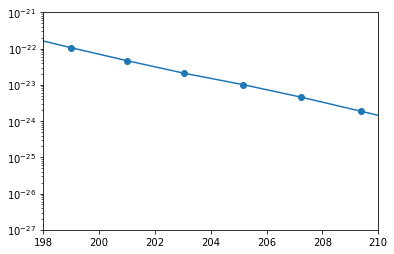

In [21]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)

ax.plot(photochem.wav[0:118]/10,photochem.sq[photochem.lh2o-1,0,:118],'o-')

ax.set_xlim(198,210)
ax.set_ylim(1e-27,1e-21)

ax.set_yscale('log')

In [17]:
photochem.wavl[0:118]

array([1210., 1300., 1350., 1400., 1450., 1500., 1550., 1600., 1650.,
       1700., 1754., 1770., 1786., 1802., 1818., 1835., 1852., 1869.,
       1887., 1905., 1923., 1942., 1961., 1980., 2000., 2020., 2041.,
       2062., 2083., 2105., 2128., 2151., 2174., 2200., 2222., 2247.,
       2273., 2299., 2326., 2353., 2381., 2410., 2439., 2469., 2500.,
       2532., 2564., 2597., 2632., 2667., 2703., 2740., 2778., 2817.,
       2857., 2899., 2941., 2985., 3030., 3077., 3125., 3175., 3225.,
       3275., 3325., 3375., 3425., 3450., 3550., 3650., 3750., 3850.,
       3950., 4050., 4150., 4250., 4350., 4450., 4550., 4650., 4750.,
       4850., 4950., 5050., 5150., 5250., 5350., 5450., 5550., 5650.,
       5750., 5850., 5950., 6050., 6150., 6250., 6350., 6450., 6550.,
       6650., 6750., 6850., 6950., 7050., 7150., 7250., 7350., 7450.,
       7550., 7650., 7750., 7850., 7950., 8050., 8150., 8250., 8350.,
       8450.])

In [5]:
lower_wv = 121 # lower bound of consideration (nm)
upper_wv = 800 # upper bound

def photgrid(star_file):
    wv,I = np.loadtxt(star_file).T
    bins = np.linspace(lower_wv,upper_wv,nw+1)
    # calculate photons/cm2/s for each bin
    F = np.zeros(nw)
    for j in range(len(bins)-1):
        ind = np.where((wv>bins[j]) & (wv<bins[j+1]))[0]
        c = 3e8 #m/s2
        h = 6.62607004e-34 #Planks constant in SI units
        FF = 0
        for i in ind:
            E = h*c/(wv[i]*1e-9) # joules/photon
            FF += I[i]*(wv[i+1]-wv[i])/1e7/E #photons/(cm2 s)
        F[j] = FF
    return F

In [6]:
Flux = photgrid('input/sun_flux.txt')

In [7]:
photochem.flux = Flux

In [13]:
def profile2dic(filename):
    file = open(filename,'r')
    lines = file.readlines()
    key = lines[0].split()
    #build dictionary of output
    out = []
    for i in range(1,len(lines)):
        tmp = []
        for j in lines[i].split():
            try:
                tmp.append(float(j))
            except ValueError:
                tmp.append(0)
        out.append(tmp)
    out = np.array(out)

    f_out = {}
    for i in range(0,len(key)):
        f_out[key[i]]=out[:,i]
    file.close()

    return f_out

In [14]:
# loads atmosphere
f = profile2dic('atmosphere.txt')
usol = np.zeros([63,200])
k= 0
for i,key in enumerate(f.keys()):
    if i>3:
        usol[k] = f[key]
        k+=1

In [16]:
usol.flatten(order='F')

array([2.496e-16, 8.885e-16, 6.294e-03, ..., 3.436e-12, 1.000e-04,
       9.992e-01])

In [17]:
usol[:,0]

array([2.496e-16, 8.885e-16, 6.294e-03, 1.027e-11, 1.788e-15, 1.872e-17,
       3.890e-17, 1.860e-04, 6.604e-08, 6.924e-13, 3.724e-16, 8.232e-16,
       4.717e-03, 1.318e-11, 2.434e-15, 1.629e-17, 4.876e-17, 1.860e-04,
       6.607e-08, 6.593e-13, 6.161e-16, 7.930e-16, 3.373e-03, 1.583e-11,
       3.061e-15, 1.491e-17, 6.276e-17, 1.860e-04, 6.612e-08, 6.159e-13,
       1.126e-15, 7.769e-16, 2.387e-03, 1.866e-11, 3.772e-15, 1.396e-17,
       8.115e-17, 1.860e-04, 6.619e-08, 5.711e-13, 2.217e-15, 7.699e-16,
       1.672e-03, 2.182e-11, 4.611e-15, 1.329e-17, 1.042e-16, 1.860e-04,
       6.630e-08, 5.272e-13, 4.569e-15, 7.830e-16, 1.131e-03, 2.497e-11,
       5.542e-15, 1.305e-17, 1.317e-16, 1.860e-04, 6.645e-08, 4.827e-13,
       9.465e-15, 1.000e-04, 9.792e-01])

In [18]:
lda = len(usol[:,0])*3+1
t = 0.0
jacob = photochem.jacobian(t,usol.flatten(order='F'),lda)

In [20]:
jacob.shape

(190, 12600)

In [12]:
# here we will read in species
fil = open('input/species.dat','r')
lines = fil.readlines()
for line in lines:
    if line[0] == '*':
#         print(line,end='')
        pass